In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
rec = pd.read_csv('../Resources/regional_economic_analysis.csv')

In [3]:
# Industries that are most popular amongst each education level 
# median income in each of these industries (according to education)
rec.head()

,Area Type,Area Name,Industry Cluster,SOC Code,SOC Title,Entry Level Education,Median Hourly Wage,Median Annual Wage,Period,New Job Openings,Replacement Job Openings,Total Projected Job openings,Online Job Ads (HWOL)
0,Economic Market,Coastal Economic Market,Aerospace,43-1011,First-Line Supervisors of Office and Administr...,High school diploma or equivalent,28.99,60300.0,2012-2022,10,5,15,904
1,Economic Market,Coastal Economic Market,Aerospace,43-5061,"Production, Planning, and Expediting Clerks",High school diploma or equivalent,28.69,59675.0,2012-2022,10,7,17,88
2,Economic Market,Coastal Economic Market,"Agriculture, Food, and Beverage Processing",11-1011,Chief Executives,Bachelor's degree,0.00,0.0,2012-2022,20,23,43,58
3,Economic Market,Coastal Economic Market,"Agriculture, Food, and Beverage Processing",11-1021,General and Operations Managers,Bachelor's degree,58.22,121102.0,2012-2022,120,109,229,213
4,Economic Market,Coastal Economic Market,"Agriculture, Food, and Beverage Processing",11-2022,Sales Managers,Bachelor's degree,69.80,145193.0,2012-2022,30,26,56,186


In [4]:
# Re-ordering rec dataframe columns
rec = rec[["Entry Level Education","Area Type","Area Name",
           "Industry Cluster","SOC Code","SOC Title","Median Hourly Wage","Median Annual Wage","Period",
          "New Job Openings","Replacement Job Openings","Total Projected Job openings","Total Projected Job openings",
          "Online Job Ads (HWOL)"]]
rec.head()

,Entry Level Education,Area Type,Area Name,Industry Cluster,SOC Code,SOC Title,Median Hourly Wage,Median Annual Wage,Period,New Job Openings,Replacement Job Openings,Total Projected Job openings,Total Projected Job openings,Online Job Ads (HWOL)
0,High school diploma or equivalent,Economic Market,Coastal Economic Market,Aerospace,43-1011,First-Line Supervisors of Office and Administr...,28.99,60300.0,2012-2022,10,5,15,15,904
1,High school diploma or equivalent,Economic Market,Coastal Economic Market,Aerospace,43-5061,"Production, Planning, and Expediting Clerks",28.69,59675.0,2012-2022,10,7,17,17,88
2,Bachelor's degree,Economic Market,Coastal Economic Market,"Agriculture, Food, and Beverage Processing",11-1011,Chief Executives,0.00,0.0,2012-2022,20,23,43,43,58
3,Bachelor's degree,Economic Market,Coastal Economic Market,"Agriculture, Food, and Beverage Processing",11-1021,General and Operations Managers,58.22,121102.0,2012-2022,120,109,229,229,213
4,Bachelor's degree,Economic Market,Coastal Economic Market,"Agriculture, Food, and Beverage Processing",11-2022,Sales Managers,69.80,145193.0,2012-2022,30,26,56,56,186


In [5]:
# All education levels in rec dataset
column_values = rec["Entry Level Education"].values.ravel()
unique_values =  pd.unique(column_values)
unique_values

array(['High school diploma or equivalent', "Bachelor's degree",
       'Less than high school', "Associate's degree",
       'Doctoral or professional degree',
       'Postsecondary non-degree award', 'Some college, no degree',
       "Master's degree", nan], dtype=object)

In [6]:
scnd = rec[rec['Entry Level Education'] == "Some college, no degree"]
scnd.head()

,Entry Level Education,Area Type,Area Name,Industry Cluster,SOC Code,SOC Title,Median Hourly Wage,Median Annual Wage,Period,New Job Openings,Replacement Job Openings,Total Projected Job openings,Total Projected Job openings,Online Job Ads (HWOL)
77,"Some college, no degree",Economic Market,Coastal Economic Market,"Agriculture, Food, and Beverage Processing",49-2011,"Computer, Automated Teller, and Office Machine...",21.37,44448.0,2012-2022,10,13,23,23,7
231,"Some college, no degree",Economic Market,Coastal Economic Market,Business Services,15-1151,Computer User Support Specialists,32.36,67299.0,2012-2022,50,22,72,72,595
350,"Some college, no degree",Economic Market,Coastal Economic Market,Community and Civic Organizations,25-9041,Teacher Assistants,0.00,32491.0,2012-2022,30,29,59,59,336
506,"Some college, no degree",Economic Market,Coastal Economic Market,Education and Training,15-1151,Computer User Support Specialists,32.36,67299.0,2012-2022,70,77,147,147,595
546,"Some college, no degree",Economic Market,Coastal Economic Market,Education and Training,25-9041,Teacher Assistants,0.00,32491.0,2012-2022,660,1075,1735,1735,336


In [7]:
scnd = scnd.drop(['Area Type', 'Area Name', 'SOC Code', 'Median Hourly Wage', 
                'New Job Openings', 'Replacement Job Openings', 'Total Projected Job openings'], axis=1)

In [8]:
scnd

,Entry Level Education,Industry Cluster,SOC Title,Median Annual Wage,Period,Online Job Ads (HWOL)
77,"Some college, no degree","Agriculture, Food, and Beverage Processing","Computer, Automated Teller, and Office Machine...",44448.0,2012-2022,7
231,"Some college, no degree",Business Services,Computer User Support Specialists,67299.0,2012-2022,595
350,"Some college, no degree",Community and Civic Organizations,Teacher Assistants,32491.0,2012-2022,336
506,"Some college, no degree",Education and Training,Computer User Support Specialists,67299.0,2012-2022,595
546,"Some college, no degree",Education and Training,Teacher Assistants,32491.0,2012-2022,336
...,...,...,...,...,...,...
70791,"Some college, no degree",Social Services,Computer User Support Specialists,57182.0,2012-2022,16181
70901,"Some college, no degree",Textiles and Apparel,Computer User Support Specialists,57182.0,2012-2022,16181
70977,"Some college, no degree",Transportation and Logistics,Computer User Support Specialists,57182.0,2012-2022,16181
71133,"Some college, no degree",Wholesale and Distribution,Computer User Support Specialists,57182.0,2012-2022,16181


In [9]:
scnd_top_industry = scnd["Industry Cluster"].value_counts()
scnd_top_industry = pd.DataFrame(scnd_top_industry)
scnd_top_industry = scnd_top_industry.head()

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

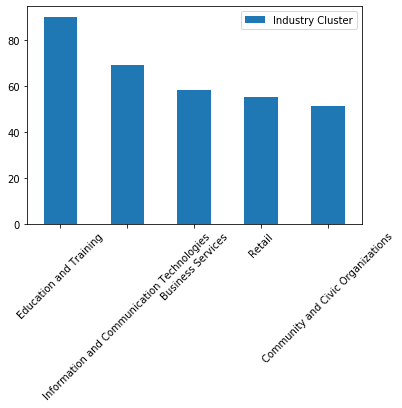

In [10]:
scnd_industry_matplotlib = scnd_top_industry.plot.bar()
plt.xticks(rotation=45)

In [11]:
scnd_top_jobs = scnd['SOC Title'].value_counts()
scnd_top_jobs = pd.DataFrame(scnd_top_jobs)
scnd_top_jobs = scnd_top_jobs.head()
scnd_top_jobs

,SOC Title
Computer User Support Specialists,423
"Computer, Automated Teller, and Office Machine Repairers",123
Teacher Assistants,123
Actors,21
Wind Turbine Service Technicians,3


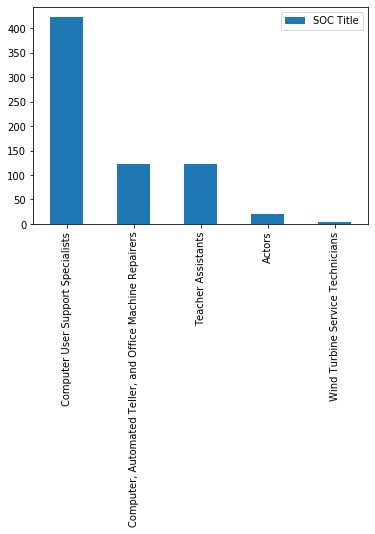

In [12]:
scnd_jobs_matplotlib = scnd_top_jobs.plot.bar()

In [13]:
comp_support = scnd[scnd['SOC Title'] == 'Computer User Support Specialists']
comp_support = comp_support["Median Annual Wage"].median(axis=0)
comp_support = pd.DataFrame({"Wage (Median)":[comp_support]})
comp_support = comp_support.rename(index={0: "Computer User Support Specialists"})
comp_support

,Wage (Median)
Computer User Support Specialists,54124.0


In [18]:
omr = scnd[scnd['SOC Title'] == 'Computer, Automated Teller, and Office Machine Repairers']
omr = omr["Median Annual Wage"].median(axis=0)
omr = pd.DataFrame({"Wage (Median)":[omr]})
omr = omr.rename(index={0: "Office Machine Repairers"})
omr

,Wage (Median)
Office Machine Repairers,41149.0


In [19]:
ta = scnd[scnd['SOC Title'] == 'Teacher Assistants']
ta = ta["Median Annual Wage"].median(axis=0)
ta = pd.DataFrame({"Wage (Median)":[ta]})
ta = ta.rename(index={0: "Teacher Assistants"})
ta

,Wage (Median)
Teacher Assistants,30242.0


In [20]:
act = scnd[scnd['SOC Title'] == 'Actors']
act = act["Median Annual Wage"].median(axis=0)
act = pd.DataFrame({"Wage (Median)":[act]})
act = act.rename(index={0: "Actors"})
act

,Wage (Median)
Actors,0.0


In [21]:
wtst = scnd[scnd['SOC Title'] == 'Wind Turbine Service Technicians']
wtst = wtst["Median Annual Wage"].median(axis=0)
wtst = pd.DataFrame({"Wage (Median)":[wtst]})
wtst = wtst.rename(index={0: "Wind Turbine Service Technicians"})
wtst

,Wage (Median)
Wind Turbine Service Technicians,49116.0


In [22]:
frames = [comp_support, omr, ta, act, wtst]
result = pd.concat(frames)
result

,Wage (Median)
Computer User Support Specialists,54124.0
Office Machine Repairers,41149.0
Teacher Assistants,30242.0
Actors,0.0
Wind Turbine Service Technicians,49116.0
